In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv("1H.csv")
dataset = dataset.iloc[11:, :]*10**5 - 127868.5
openVal = dataset.iloc[:, 34]
closeVal = dataset.iloc[:, 37]
openVal = openVal
closeVal = closeVal
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[  6471.5   6421.5   6461.5 ... -16608.5 -16620.5 -16614.5]
[  6411.5   6471.5   6481.5 ... -16620.5 -16613.5 -16622.5]
[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

In [7]:
print(max(dataset.iloc[:, 1:].max()))
print(min(dataset.iloc[:, 1:].min()))

32511.5
-32511.5


# Find high value by open value

In [8]:
x = dataset.iloc[:, 1:35].values
y = dataset.iloc[:,   35].values
y = y.reshape(len(y),1)
print(x)
print(y)

[[  6451.5   6461.5   6381.5 ...   6511.5   6451.5   6471.5]
 [  6411.5   6411.5   6361.5 ...   6471.5   6401.5   6421.5]
 [  6351.5   6371.5   6291.5 ...   6561.5   6411.5   6461.5]
 ...
 [-16438.5 -16421.5 -16618.5 ... -16578.5 -16639.5 -16608.5]
 [-16588.5 -16491.5 -16652.5 ... -16565.5 -16627.5 -16620.5]
 [-16585.5 -16547.5 -16648.5 ... -16613.5 -16676.5 -16614.5]]
[[  6471.5]
 [  6561.5]
 [  6541.5]
 ...
 [-16565.5]
 [-16613.5]
 [-16576.5]]


In [9]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 35]
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[  6452.6    6471.5 ]
 [  6452.6    6561.5 ]
 [  6592.5    6541.5 ]
 ...
 [-16517.03 -16565.5 ]
 [-16517.03 -16613.5 ]
 [-16511.25 -16576.5 ]]


In [11]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9999438226306301

In [12]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

2525.58984375
69.58179403851547


# Find next low

In [13]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[  6451.5    6461.5    6381.5  ...   6451.5    6471.5    6452.6 ]
 [  6411.5    6411.5    6361.5  ...   6401.5    6421.5    6452.6 ]
 [  6351.5    6371.5    6291.5  ...   6411.5    6461.5    6592.5 ]
 ...
 [-16438.5  -16421.5  -16618.5  ... -16639.5  -16608.5  -16517.03]
 [-16588.5  -16491.5  -16652.5  ... -16627.5  -16620.5  -16517.03]
 [-16585.5  -16547.5  -16648.5  ... -16676.5  -16614.5  -16511.25]]


In [14]:
y = dataset.iloc[:, 36]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[  6401.5]
 [  6411.5]
 [  6451.5]
 ...
 [-16627.5]
 [-16676.5]
 [-16627.5]]


In [15]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 36].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[  6426.16   6401.5 ]
 [  6325.42   6411.5 ]
 [  6426.16   6451.5 ]
 ...
 [-16607.38 -16627.5 ]
 [-16724.25 -16676.5 ]
 [-16724.25 -16627.5 ]]


In [17]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9999438581682003

In [18]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

1491.1523437499854
69.91170909826378


# Find close

In [19]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[  6451.5    6461.5    6381.5  ...   6471.5    6452.6    6426.16]
 [  6411.5    6411.5    6361.5  ...   6421.5    6452.6    6325.42]
 [  6351.5    6371.5    6291.5  ...   6461.5    6592.5    6426.16]
 ...
 [-16438.5  -16421.5  -16618.5  ... -16608.5  -16517.03 -16607.38]
 [-16588.5  -16491.5  -16652.5  ... -16620.5  -16517.03 -16724.25]
 [-16585.5  -16547.5  -16648.5  ... -16614.5  -16511.25 -16724.25]]


In [20]:
y = dataset.iloc[:, 37]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[  6411.5]
 [  6471.5]
 [  6481.5]
 ...
 [-16620.5]
 [-16613.5]
 [-16622.5]]


In [21]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 37].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[  6435.69   6411.5 ]
 [  6351.66   6471.5 ]
 [  6570.16   6481.5 ]
 ...
 [-16561.49 -16620.5 ]
 [-16561.49 -16613.5 ]
 [-16561.49 -16622.5 ]]


In [23]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9999106296096635

In [24]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

1531.16796875
89.33317003387693


# Checking ascending

In [25]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[  6451.5    6461.5    6381.5  ...   6471.5    6452.6    6426.16]
 [  6411.5    6411.5    6361.5  ...   6421.5    6452.6    6325.42]
 [  6351.5    6371.5    6291.5  ...   6461.5    6592.5    6426.16]
 ...
 [-16438.5  -16421.5  -16618.5  ... -16608.5  -16517.03 -16607.38]
 [-16588.5  -16491.5  -16652.5  ... -16620.5  -16517.03 -16724.25]
 [-16585.5  -16547.5  -16648.5  ... -16614.5  -16511.25 -16724.25]]


In [26]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[17216 31935]
 [ 6174 44784]]


0.6193249358199563

In [28]:
prediction = []
openValues = dataset.iloc[:, 34]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(100109,)
[[28670 20481]
 [21301 29657]]


0.5826349279285579

In [29]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [30]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

        high error  low error  close error
0        18.903320  24.656250    24.190430
1       108.903320  86.080566   119.843750
2        50.995117  25.343750    88.657227
3        99.004883  65.343750   111.342773
4        25.121094  73.924805    19.640137
...            ...        ...          ...
100104    6.769531  50.675781    90.851562
100105   34.492188  84.751953    47.013672
100106   48.468750  20.115234    59.013672
100107   96.468750  47.751953    52.013672
100108   65.248047  96.751953    61.013672

[100109 rows x 3 columns]


In [31]:
x = []
for i in range(100109):
    x.append(i)

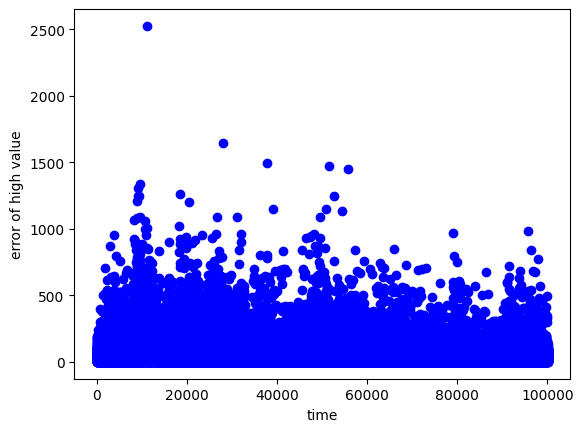

In [32]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [33]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

79552


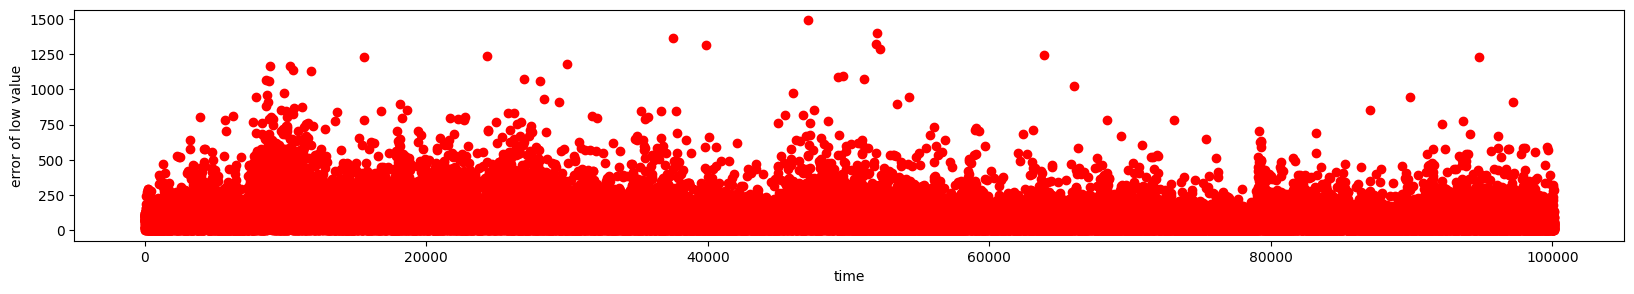

In [34]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [35]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

79189


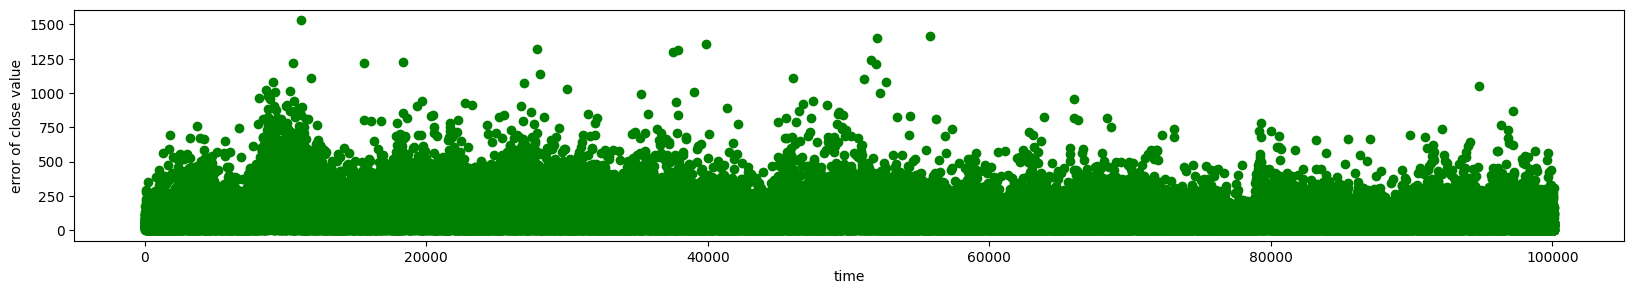

In [36]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [37]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

68938


In [38]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 79.46538273282123
percent of under 100 for low is 79.1027779720105
percent of under 100 for close is 68.8629393960583


In [39]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 95.3800357610205
percent of under 200 for low is 95.40301071831703
percent of under 200 for close is 90.24463334964888


In [40]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 91.15963599676353
percent of under 150 for low is 90.86196046309523
percent of under 150 for close is 82.96656644257759


In [41]:
dataset

,high error,low error,close error
0,18.903320,24.656250,24.190430
1,108.903320,86.080566,119.843750
2,50.995117,25.343750,88.657227
3,99.004883,65.343750,111.342773
4,25.121094,73.924805,19.640137
...,...,...,...
100104,6.769531,50.675781,90.851562
100105,34.492188,84.751953,47.013672
100106,48.468750,20.115234,59.013672
100107,96.468750,47.751953,52.013672
